In [7]:
clear all;

## Fonction de creation du noyau

## Definition des variables

### Definition des variables d'entre

In [8]:
clear all;
% points de données d'entrée
X = 0:0.01:0.99;
X = X';

### Definition de modele : 

On commence par un modele alearatoire

In [9]:
% definition de modele
y = cos(2*pi*X);

### Repartition des variables en entrainement et test

In [10]:

X_test = X(1:2:end);
y_test = y(1:2:end);
X_train = X(2:2:end);
y_train = y(2:2:end);
n = length(X); % nombre de points de données
n2 = length(X_train);
% size(y_train)

In [11]:
size(X)


ans =

   100     1



### Definition des parametres 

In [12]:
 % parametres initiaux
omega = ones(n2, 1);
size(omega)


ans =

    50     1



## Definition de noyau 

### Implementation de fonction de noyau

fichier noyau.m : 

In [13]:
% %%file noyau.m

% function noyau = noyau(x, x1, choix)
%   switch choix
%       case 1
%           % Noyau linéaire
%           c = 0.1; 
%           y = x' * x1 + c;
%       case 2
%           % Noyau polynomial
%           alpha = 0.05*10^-5; % Valeur arbitraire pour alpha, vous pouvez ajuster selon vos besoins
%           c = 1; % Valeur arbitraire pour c, vous pouvez ajuster selon vos besoins
%           d = 2; % Valeur arbitraire pour d, vous pouvez ajuster selon vos besoins
%           y = (alpha .* (x' .* x1) + c) .^ d;
%       case 3
%           % Noyau gaussien
%           sigma = 0.1; 
%           y = exp(-norm(x - x1) .^ 2 ./ (2 * sigma^2));
%       case 4
%           % Noyau exponentiel
%           sigma = 5; 
%           y = exp(-norm(x - x1) ./ (2 * sigma ^ 2));
%       case 5
%           % Noyau laplacien
%           sigma = 1; 
%           y = exp(-norm(x - x1) / sigma);
%       case 6
%           % Noyau sinc
%           sigma = 1; 
%           y = prod(sin(sigma * (x - x1)) ./ (sigma * (x - x1)));
%       otherwise
%           error('Type de noyau non reconnu.');
%   end
%   noyau = y;
% end

### Definition de noyau linéaire

In [14]:
% choix de noyau linéaire
choix = 2;
K = zeros(n2, n2);
for i = 1:n2 
  K(i, :) = noyau(X_train, X_train(i, :), choix);
end  
size(K)


ans =

    50    50



## Definition du fonction

La fonction est définie comme suivant : 

$f(\omega, x) = \sum_{i=1}^{n} \omega_i K(x, x_i)$


In [15]:
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);

## Definition de function de risque empirique

La fonction de risque empirique est définit comme suivante :

$ J (\omega, y) =  \frac{1}{n} \sum_{i = 0}^{n} \|f(\omega_i) - y_i\|^2  $ 


In [16]:
J = @(omega, y) 1/n * norm(f(omega) - y);

## Definition de gradient J

In [17]:
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);

## Gradient descent

In [18]:
alpha = 0.001;
num_iterations = 5000;
hist_omega = zeros(n2, num_iterations);
for i = 1:num_iterations
  omega =  omega - (alpha * gradJ(omega));
  hist_omega(:, i) = omega;
  err(i) = J(omega, y_train);
end

In [19]:
err(i)


ans =

    0.3541



In [20]:
norm(gradJ(omega))


ans =

    0.0066



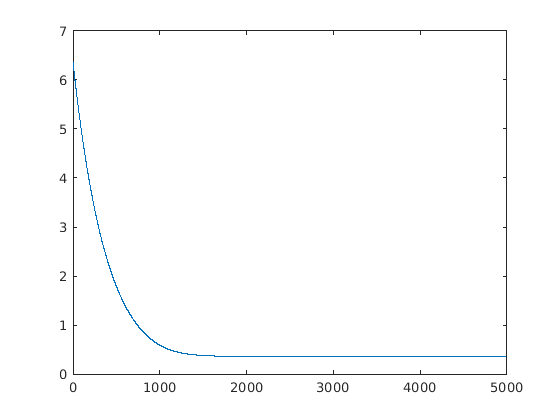

In [21]:
plot(1:num_iterations, err)

## Extraction des omega optimaux

In [24]:
min_err = find(err == min(err));
opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)


ans =

    0.3541



## Affichage de resultats

On affiche les y_train avec les y que notre model a predit

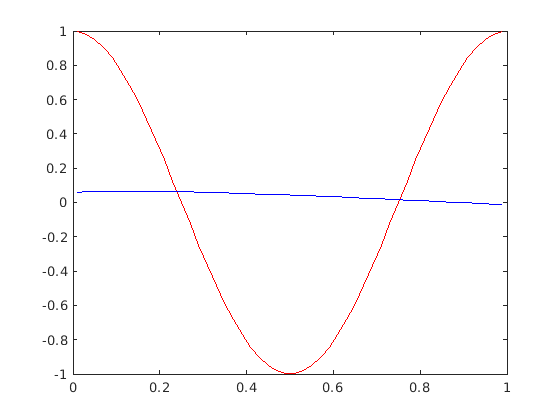

In [25]:
y_train_predit = f(opt_omega);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_train_predit, 'b')
hold off

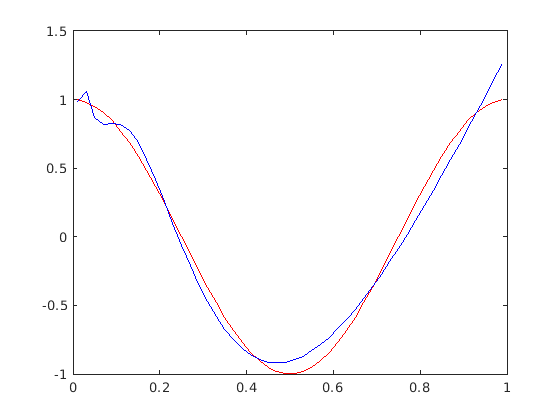

In [745]:
w_et = (K' * K) \ (K' * y_train);
y_opt = f(w_et);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_opt, 'b')
hold off

## Sur les donnees de test

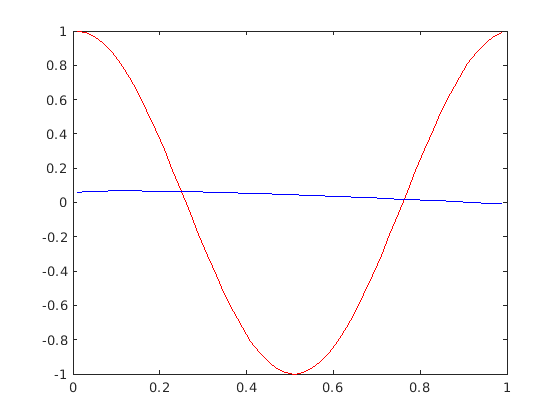

In [746]:
% y de test
y_test_predit = f(opt_omega);
plot(X_train, y_test, 'r')
hold on
plot(X_train, y_test_predit, 'b')
hold off

In [747]:
% y_train_predit = f(opt_omega, X_train );

norm(y_train_predit - y_train)


ans =

   35.4120



In [748]:
norm(y_test_predit - y_test)


ans =

   35.4120



In [749]:
w_et = (K' * K) \ (K' * y_train);
norm(opt_omega - w_et)
w_et;
opt_omega;



ans =

   4.8503e+07



## Utilisation des autres modèles

$
(1) \quad f^*(x) = |x|, \quad x \in [-1, 1] \\
(2) \quad f^*(x) = 3\|x\|^3 - 2\|x\|^2 + 3\|x\|^2 + 3, \quad x \in [-1, 1]^3 \\
(3) \quad f^*(x) = \sin(x_1 + x_2), \quad x \in [-2, 2]^2 \\
(4) \quad f^*(x) = \frac{1}{3}(x_1 + x_2)^3 - \frac{1}{4}(x_1 + x_2)
$

# Fonction 1)

In [45]:
clear all;
X = -1:0.01:0.99;
X = X';
X_train = X(1:2:end);
X_test = X(2:2:end);
% size(X_train)
y_train = modele(1, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
  for i = 1:n2 
    K(i, :) = noyau(X_train, X_train(i, :), 2);
  end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


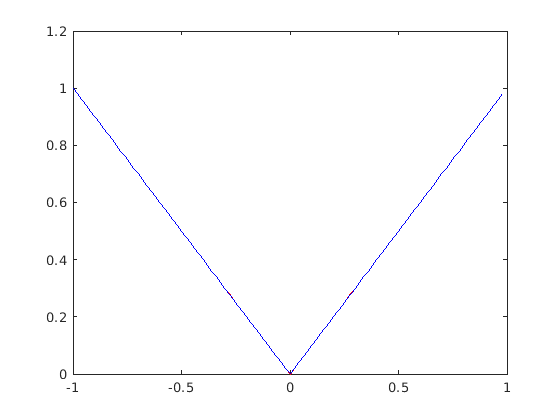

In [46]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_et, 'b')
hold off

In [47]:
alpha = 0.1;
num_iterations = 1000;
err = zeros(1, num_iterations);
for i = 1:num_iterations
  omega =  omega - (alpha * gradJ(omega));
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
end

In [48]:
norm(gradJ(omega))


ans =

   4.1013e-04



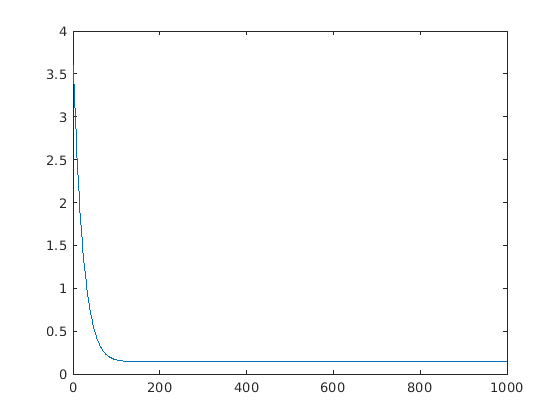

In [49]:
plot(1:num_iterations, err)


ans =

    0.1473



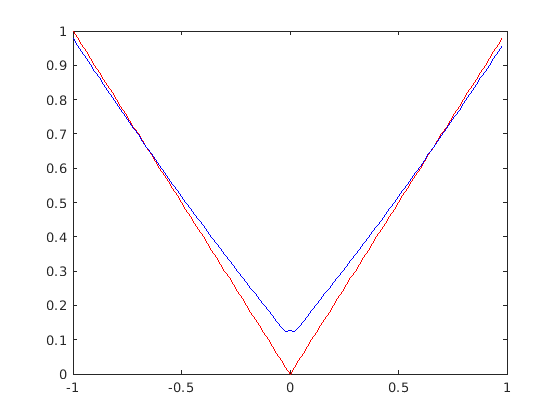

In [50]:
min_err = 0;
opt_omega = zeros(n2, 1);
min_err = find(err == min(err));
opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_predit, 'b')
hold off


# Fonction 2)

In [10]:
clear all;

X1 = -1:0.01:0.99;
X2 = -0.99:0.01:1;
X3 = (X1' - X2');
X = [X1', X2', X3'];
X_train = X(1:2:end, :);
X_test = X(2:2:end, : );
% size(X_train)
y_train = modele(3, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
  for i = 1:n2 
    K(i, :) = noyau(X_train, X_train(i, :), 2);
  end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


Error using horzcat
Dimensions of arrays being concatenated are not consistent.



In [9]:
size(X)


ans =

   200     3



In [5]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_et, 'b')
hold off

Error using plot
Vectors must be the same length.



# Fonction3)

In [169]:
clear all;
X1 = -2:0.02:1.99;
X2 = -1.99:0.02:2;
X = [X1', X2'];
% X = X';
X_train = X(1:2:end, :);
X_test = X(2:2:end, :);
% size(X_train)
y_train = modele(3, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
  for i = 1:n2 
    for j = 1:n2
      K(i, j) = noyau(X_train(i, :), X_train(j, :), 4);
    end  
  end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


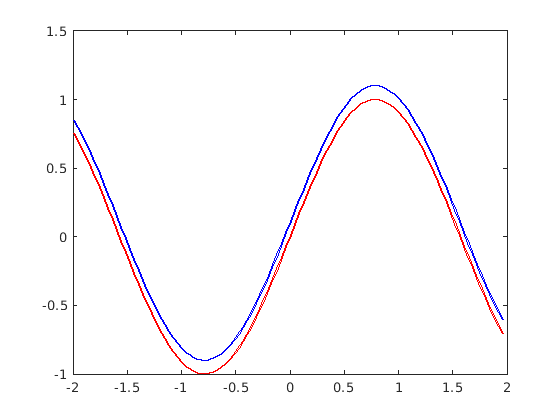

In [170]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_et, 'b')
hold off

In [199]:
alpha = 0.009;
num_iterations = 100000;
err = zeros(1, num_iterations);
for i = 1:num_iterations
  omega =  omega - (alpha * gradJ(omega));
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
end

In [200]:
omega


omega =

    1.3738
    1.3570
    1.3239
    1.2756
    1.2133
    1.1381
    1.0512
    0.9539
    0.8474
    0.7330
    0.6120
    0.4857
    0.3553
    0.2221
    0.0874
   -0.0477
   -0.1819
   -0.3142
   -0.4433
   -0.5682
   -0.6880
   -0.8017
   -0.9085
   -1.0074
   -1.0979
   -1.1792
   -1.2507
   -1.3121
   -1.3628
   -1.4025
   -1.4310
   -1.4482
   -1.4539
   -1.4482
   -1.4312
   -1.4031
   -1.3641
   -1.3147
   -1.2551
   -1.1860
   -1.1078
   -1.0212
   -0.9269
   -0.8256
   -0.7182
   -0.6054
   -0.4880
   -0.3672
   -0.2436
   -0.1183
    0.0077
    0.1336
    0.2583
    0.3809
    0.5004
    0.6160
    0.7267
    0.8317
    0.9302
    1.0215
    1.1047
    1.1793
    1.2446
    1.3001
    1.3454
    1.3800
    1.4037
    1.4162
    1.4174
    1.4072
    1.3856
    1.3528
    1.3090
    1.2544
    1.1894
    1.1145
    1.0302
    0.9371
    0.8360
    0.7277
    0.6129
    0.4927
    0.3679
    0.2397
    0.1092
   -0.0225
   -0.1542
   -0.2847
   -0.4126
   -0.5368


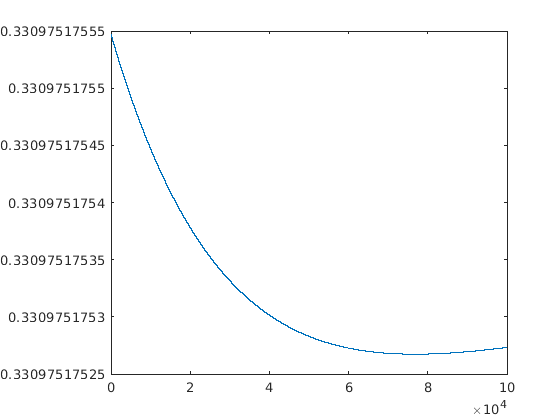

In [201]:
plot(1:num_iterations, err)


ans =

    0.3573



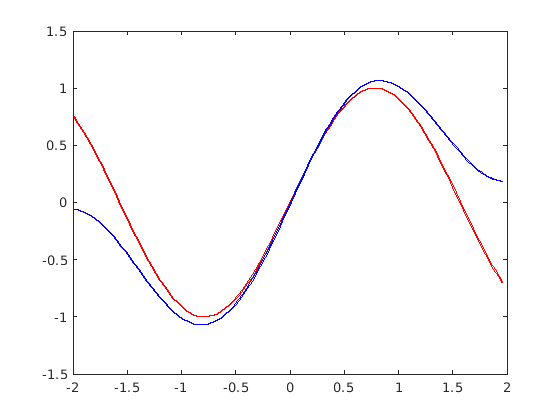

In [202]:
min_err = 0;
opt_omega = zeros(n2, 1);
min_err = find(err == min(err));
opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_predit, 'b')
hold off
